# Airline Passenger Satisfaction Analysis
*Eine datengetriebene Analyse und Modellierung der Passagierzufriedenheit im Luftverkehr*

---

**Erstellt von:** Hasan Hüseyin Demirci, Andreas Hubertus, Sebastian Rein, Vitalii Solonychnyi  

**Modul:** Grundlagen Data Science und Künstliche Intelligenz 1

**Dozentin:** Prof. Dr. Jennifer Schoch  

**Hochschule:** Duale Hochschule Baden-Württemberg Karlsruhe

**Datum:** 22.11.2025

---



## Inhaltsverzeichnis

1. Einleitung
2. Business Understanding und Zielsetzung
3. Data Understanding
4. Data Preparation
5. Modeling
6. Fazit


---


## 1. Einleitung

Dieses Projekt ist im Rahmen der Portolioprüfung im Modul Grundlagen Data Science und Künstliche Intelligenz 1 entstanden. 
Bestandteile der Prüfung sind dieses Notebook sowie ein Prüfungsgespräch am 1.12.2025


Nachdem wir uns in unserer Gruppe gefunden hatten, galt es, zunächst einen Datensatz zu finden, der uns interessant erschien und zu dem wir eine passende Fragestellung formulieren konnten. Schnell einigten wir uns auf den Datensatz "Airline Passenger Satisfaction", der auf der bekannten Data Science-Website kaggle.com zur Verfügung steht. 
Er kann über folgenden Link aufgerufen, gedownloaded und ausgelesen werden:

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data


Im Folgenden ist unser Data Mining Prozess auf Grundlage des CRISP-DM Modells ausführlich dargestellt und kommentiert. 


---


# 2. Business Understanding und Zielsetzung

Im ersten Schritt des CRISP-DM Prozesses geht es darum, ein Verständnis für die zu analysierenden Daten zu entwickeln und eine klare Forschungsfrage zu formulieren. Daher suchten wir zunächst auf https://scholar.google.de/ nach wissenschaftlichen Publikationen, die bereits zu diesem oder ähnlichen Themen veröffentlicht wurden, um zu sehen, welche Forschungsfragen bereits gestellt und welche Erkenntnisse gewonnen worden waren. Dies ist eine gute Möglichkeit, Domänenwissen im Bereich Flugpassagierzufriedenheit zu erlangen und zu sehen, wo mit dem eigenen Projekt angesetzt werden kann. 

In der Studie "Prediction of US airline passenger satisfaction using machine learning algorithms" (Quelle: https://pdfs.semanticscholar.org/23a5/760607a9db8b6860a99fa0d97d1535854c62.pdf) werden vor allem folgende zwei Forschungsfragen analysiert: 

-Sind Passagiere von US-Airlines eher zufrieden oder unzufrieden mit der Qualität des Services von   US-Airlines?
-Welche Merkmale des Services haben Einfluss auf die Zufriedenheit von Passagieren?

Die Daten wurden von den Autoren daraufhin systematisch durch verschiedene Machine Learning Modelle ausgewertet.

Das Ergebnis war, dass einige Merkmale wie (...)



Die zentrale Forschungsfrage, der wir in diesem Projekt nachgehen, lautet:

*Welche Faktoren beeinflussen die Gesamtzufriedenheit eines Flugpassagiers am meisten und inwiefern korrelieren die einzelenen Faktoren?*


Maßgebend für den Erfolg einer deartigen Analyse ist es, den Prozess zu planen und Verantwortlichkeiten im Team festzulegen. So legten wir fest, dass ... (...)


Außerdem legten wir uns selbst eine sogenannte SMART-Zielsetzung fest. Hierbei steht jeder Buchstabe im Wort "Smart" für eine Bedingung, die für ein erfolgreiches Projekt unabdingbar ist.

*Specific:* Wir haben eine präzise Forschungsfrage formuliert.

*Measurable:* Wir betrachten die Korrelationskoeffizienten ausgewählter Faktoren, um ihren Einfluss zu bewerten und zu vergleichen.

*Achievable:* Ja, wir nutzen Python mit grundlegenden Funktionen der Bibliotheken NumPy, Pandas und Matplotlib und folgen dem CRISP-DM Modell.

*Realistic:* Ja, wir nutzen die verfügbare Zeit während den DSKI-Vorlesungen sowie Zeit im Selbststudium

*Time-bound:* Die Abgabefrist dieses Notebooks ist der 23.11.2025. Das mündliche Prüfungsgespräch findet am 01.12.2025 statt.


Nachdem alle Ziele gesetzt und Rollen verteilt waren, waren wir bereit das erste mal mit unserem gewählten Datensatz zu arbeiten.

---




# 3. Data Understanding

Zunächst importierten wir die Bibliotheken NumPy und Pandas und luden unseren Datensatz, eine CSV-Datei mit dem Namen "train.csv", in ein Pandas Dataframe:

In [22]:
import numpy as np
import pandas as pd

df = pd.read_csv("train.csv")

Danach lasen wir die ersten 5 Zeilen aus, um uns einen ersten Überblick zu verschaffen:

In [23]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [24]:
print(f"Anzahl Spalten: {len(df.columns)} \nAnzahl Zeilen: {len(df)}")

Anzahl Spalten: 25 
Anzahl Zeilen: 103904


Der Datensatz umfasst also Informationen zu über 103.000 Flugpassagieren, die anhand von 24 Kategorien hinsichtlich ihrer Merkmale und persönlichen Bewertungen erfasst wurden.

In [25]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [26]:
df.info

<bound method DataFrame.info of         Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  F

Sehr wahrscheinlich wurden die Daten durch einen elektronischen Umfragebogen erhoben, den Flugpassagiere individuell nach einem Flug ausfüllen konnten.

Zum einen sind persönliche Merkmale berücksichtigt, wie das Geschlecht (gender) oder das Alter (age) sowie die geflogene Klasse (class) oder die Art der Reise (type of travel). 
Zum anderen sind Bewertungen auf einer Skala von 0 bis 5 erkennbar, beispielsweise bezüglich der Verpflegung an Bord (food and dring) oder dem Umgang des Personals mit Gepäcksstücken (baggage handling)

Bei allen Variablen ist durch die Spaltennamen intuitiv klar, welche Informationen daraus gewonnen werden können.

Auffälig ist das die Bewertungen durchschnittlich fast alle im "3,"-Bereich liegen.

*An dieser Stelle müssen wir noch ausführlicher auf erste Erkenntisse eingehen*




Durch Indexing ist es möglich, gezielt Werte in unserem DataFrame zu filtern.
Wir formulieren folgende Fragen, die wir danach mithilfe von Indexing beantworten möchten:

- Wie hoch ist die Zufriedenheit (satisfaction) je nach Geschlecht und Alter?
- Wie hoch ist sie je nach Kundentyp beziehungsweise je nach Art der Reise?
- Welchen Einfluss haben Flugverspätungen auf die Zufriedenheit der Gäste?
- Wie werden die verschiedenen Service-Kategorien bewertet?
- Wirkt sich die geflogene Distanz (flight distance) auf die Zufriedenheit aus?



Unsere Hypothesen sind, dass ältere Gäste (...)


Streungsmaße, Abstand Mittelwert - Median, spannende erkenntnisse, streuung (...)



### A2:

Indizierung und Manipulation:
- durchschnittliche Zufriedenheit nach gender 
- customer type oder type of travel.
- einflussvon Flugverspätungen auf Zufriedenheit
- Bewertung von Servicekategorien
- Zufriedenheit nach alter
- Korrelation zwischen Flight Distance und Zufriedenheit


Hypothesen:
1. Älteren Leuten (>70 Jahre) schätzen die Möglichkeit der Onlinebuchung mehr wert, bemängeln jedoch die Suaberkeit mehr.



# Sebastian Einfügen

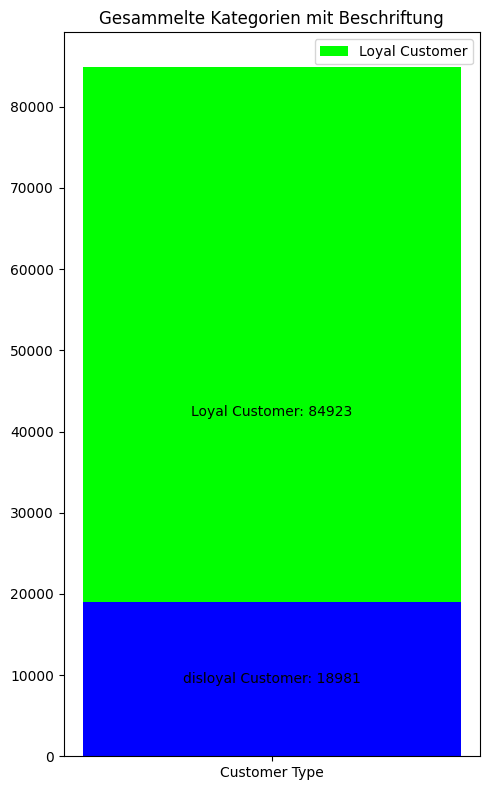

In [27]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
cust_counts = df['Customer Type'].value_counts()

values = [cust_counts.get('Loyal Customer', 0), cust_counts.get('disloyal Customer', 0)]
labels = ['Loyal Customer', 'disloyal Customer']
colors = ['lime', 'blue']

fig, ax = plt.subplots(figsize=(5, 8))
bars = ax.bar(['Customer Type'], values, color=colors)

for bar, label, value in zip(bars, labels, values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f"{label}: {value}",
            ha='center', va='center', color='black', fontsize=10)

ax.set_title('Gesammelte Kategorien mit Beschriftung')
ax.yaxis.grid(False)

plt.legend(labels, loc='upper right')
plt.tight_layout()
plt.show()

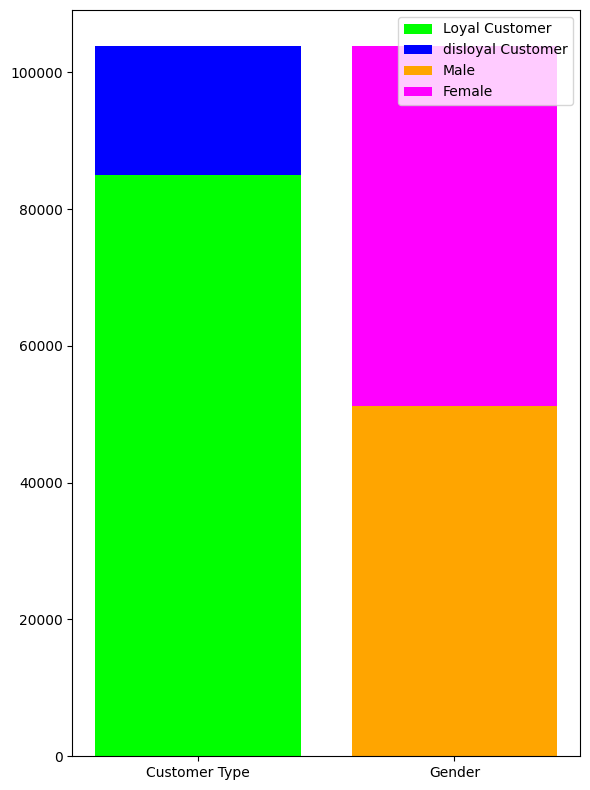

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

cust_counts = df['Customer Type'].value_counts()
loyal = cust_counts.get('Loyal Customer', 0)
disloyal = cust_counts.get('disloyal Customer', 0)

gender_counts = df['Gender'].value_counts()
male = gender_counts.get('Male', 0)
female = gender_counts.get('Female', 0)

fig, ax = plt.subplots(figsize=(6, 8))

ax.bar(0, loyal, color='lime', label='Loyal Customer')
ax.bar(0, disloyal, bottom=loyal, color='blue', label='disloyal Customer')

ax.bar(1, male, color='orange', label='Male')
ax.bar(1, female, bottom=male, color='magenta', label='Female')

ax.set_xticks([0, 1])
ax.set_xticklabels(['Customer Type', 'Gender'])

ax.legend()
plt.tight_layout()
plt.show()


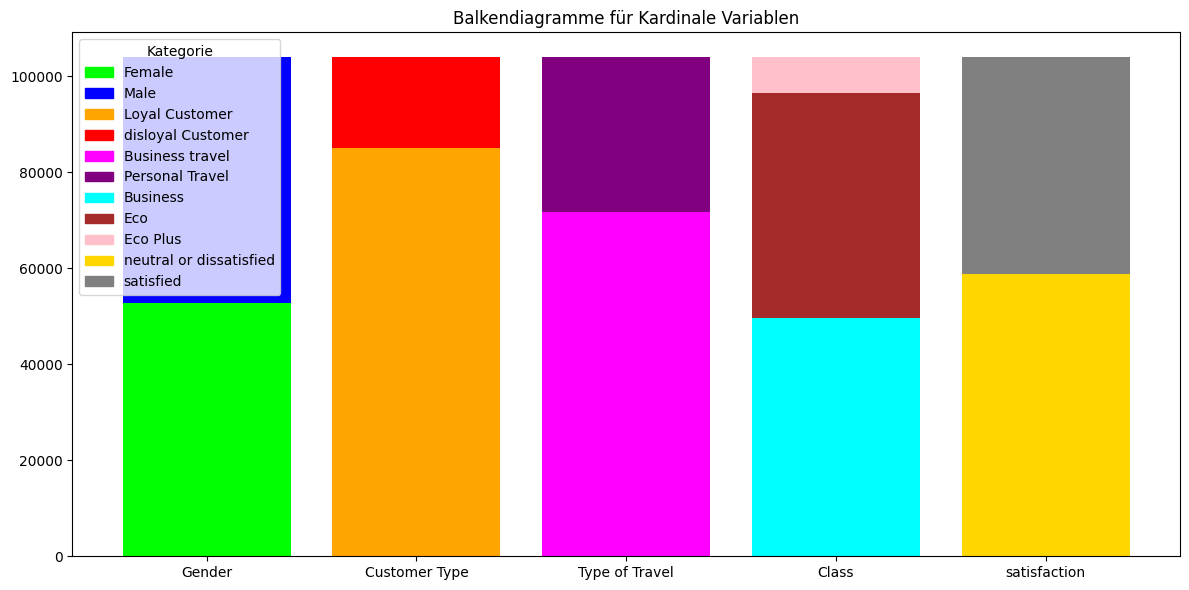

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
x_positions = range(len(columns))
fig, ax = plt.subplots(figsize=(12, 6))

palette = {
    'Gender': ['lime', 'blue'],
    'Customer Type': ['orange', 'red'],
    'Type of Travel': ['magenta', 'purple'],
    'Class': ['cyan', 'brown', 'pink'],
    'satisfaction': ['gold', 'grey']
}

legend_entries = {}

for col_idx, col in enumerate(columns):
    counts = df[col].value_counts()
    bottom = 0
    colors = palette[col]
    for i, (cat, val) in enumerate(counts.items()):
        color = colors[i % len(colors)]
        ax.bar(col_idx, val, bottom=bottom, color=color)
        bottom += val
        if cat not in legend_entries:
            legend_entries[cat] = color

ax.set_xticks(list(x_positions))
ax.set_xticklabels(columns)

handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_entries.values()]
labels = list(legend_entries.keys())
ax.legend(handles, labels, title="Kategorie")

plt.title("Balkendiagramme für Kardinale Variablen")
plt.tight_layout()
plt.show()


# 5 Benfords Law und Plots


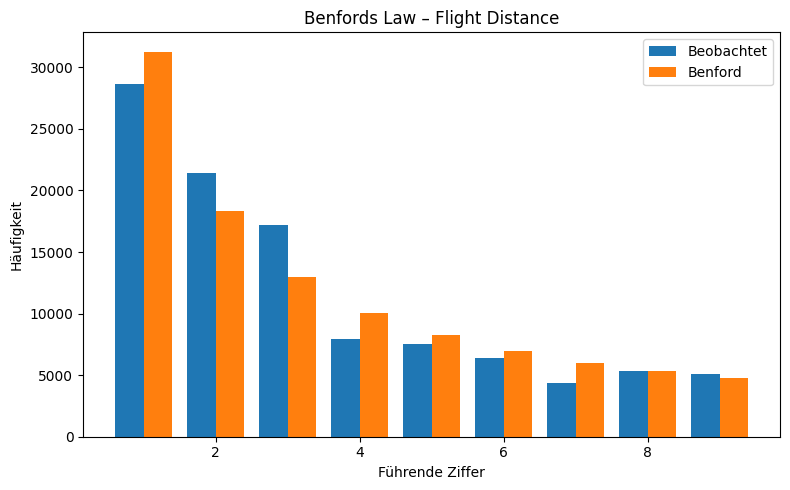

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
column = "Flight Distance"
values = df[column].dropna()
values = values[values > 0]

leading = values.astype(str).str.replace(r"[^\d]", "", regex=True).str[0]
leading = leading[leading.isin(list("123456789"))].astype(int)

observed_counts = leading.value_counts().sort_index()
expected_counts = pd.Series({d: np.log10(1 + 1/d) for d in range(1,10)}) * len(leading)

plt.figure(figsize=(8,5))
plt.bar(observed_counts.index - 0.2, observed_counts.values, width=0.4, label="Beobachtet")
plt.bar(expected_counts.index + 0.2, expected_counts.values, width=0.4, label="Benford")
plt.xlabel("Führende Ziffer")
plt.ylabel("Häufigkeit")
plt.title(f"Benfords Law – {column}")
plt.legend()
plt.tight_layout()
plt.show()


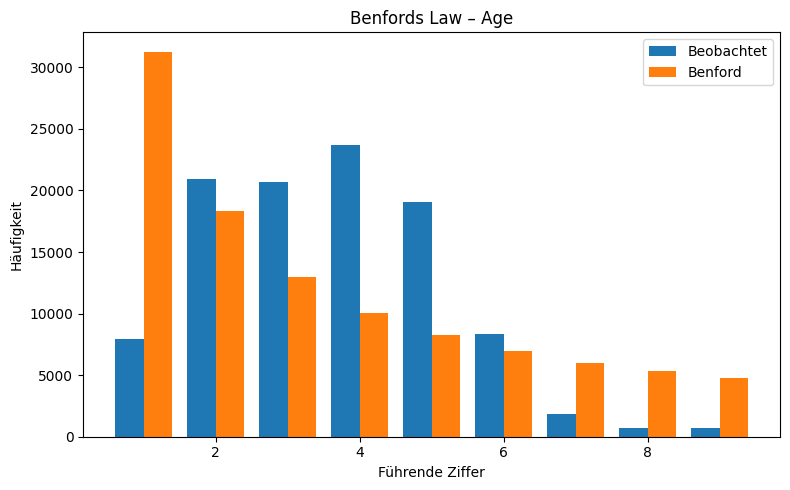

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
column = "Age"
values = df[column].dropna()
values = values[values > 0]

leading = values.astype(str).str.replace(r"[^\d]", "", regex=True).str[0]
leading = leading[leading.isin(list("123456789"))].astype(int)

observed_counts = leading.value_counts().sort_index()
expected_counts = pd.Series({d: np.log10(1 + 1/d) for d in range(1,10)}) * len(leading)

plt.figure(figsize=(8,5))
plt.bar(observed_counts.index - 0.2, observed_counts.values, width=0.4, label="Beobachtet")
plt.bar(expected_counts.index + 0.2, expected_counts.values, width=0.4, label="Benford")
plt.xlabel("Führende Ziffer")
plt.ylabel("Häufigkeit")
plt.title(f"Benfords Law – {column}")
plt.legend()
plt.tight_layout()
plt.show()


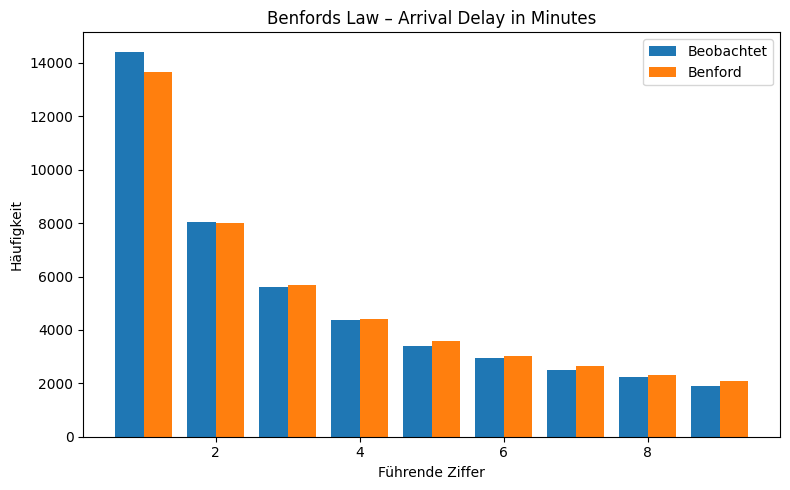

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
column = "Arrival Delay in Minutes"
values = df[column].dropna()
values = values[values > 0]

leading = values.astype(str).str.replace(r"[^\d]", "", regex=True).str[0]
leading = leading[leading.isin(list("123456789"))].astype(int)

observed_counts = leading.value_counts().sort_index()
expected_counts = pd.Series({d: np.log10(1 + 1/d) for d in range(1,10)}) * len(leading)

plt.figure(figsize=(8,5))
plt.bar(observed_counts.index - 0.2, observed_counts.values, width=0.4, label="Beobachtet")
plt.bar(expected_counts.index + 0.2, expected_counts.values, width=0.4, label="Benford")
plt.xlabel("Führende Ziffer")
plt.ylabel("Häufigkeit")
plt.title(f"Benfords Law – {column}")
plt.legend()
plt.tight_layout()
plt.show()


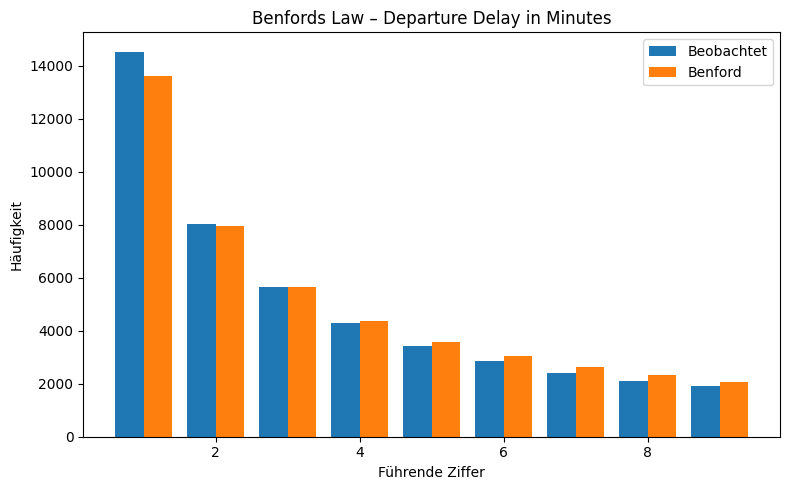

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")
column = "Departure Delay in Minutes"
values = df[column].dropna()
values = values[values > 0]

leading = values.astype(str).str.replace(r"[^\d]", "", regex=True).str[0]
leading = leading[leading.isin(list("123456789"))].astype(int)

observed_counts = leading.value_counts().sort_index()
expected_counts = pd.Series({d: np.log10(1 + 1/d) for d in range(1,10)}) * len(leading)

plt.figure(figsize=(8,5))
plt.bar(observed_counts.index - 0.2, observed_counts.values, width=0.4, label="Beobachtet")
plt.bar(expected_counts.index + 0.2, expected_counts.values, width=0.4, label="Benford")
plt.xlabel("Führende Ziffer")
plt.ylabel("Häufigkeit")
plt.title(f"Benfords Law – {column}")
plt.legend()
plt.tight_layout()
plt.show()


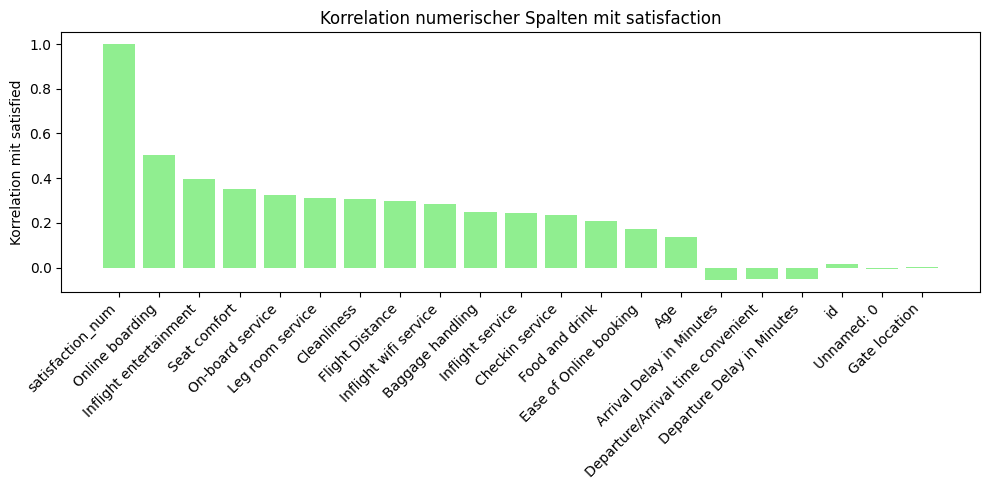

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV laden
df = pd.read_csv("train.csv")

# Kategoriale satisfaction in Zahlen umwandeln
df['satisfaction_num'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# Numerische Spalten auswählen (ohne satisfaction_num selbst)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Korrelation mit satisfaction_num
correlations = numeric_df.corrwith(df['satisfaction_num'])

# Sortieren nach Betrag der Korrelation
correlations = correlations.sort_values(key=abs, ascending=False)

# Barplot
plt.figure(figsize=(10,5))
plt.bar(correlations.index, correlations.values, color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Korrelation mit satisfied")
plt.title("Korrelation numerischer Spalten mit satisfaction")
plt.tight_layout()
plt.show()
